<a href="https://colab.research.google.com/github/heyitsmialee/Learning-Logs/blob/main/DL/02_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
datax = np.load('/content/drive/MyDrive/MNIST.npy', allow_pickle=True)
datay = np.load('/content/drive/MyDrive/Label.npy', allow_pickle=True)

Mounted at /content/drive/


In [ ]:
datax.shape

(60000, 28, 28)

In [ ]:
datax_norm = datax/255
print('최대 : {}, 최소 : {}'.format(np.max(datax_norm), np.min(datax_norm)))

최대 : 1.0, 최소 : 0.0


In [ ]:
datay_onehot = to_categorical(datay)
print(datay[0:10])
print(datay_onehot[0:10,:])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax_norm, datay_onehot, test_size=0.3, random_state=111)

In [ ]:
print(trnx.shape)
print(trny.shape)

(42000, 28, 28)
(42000, 10)


In [ ]:
trnx_reshape = trnx.reshape(-1,28,28,1)
tstx_reshape = tstx.reshape(-1,28,28,1)
trnx_reshape.shape

(42000, 28, 28, 1)

**Sequential API**

In [ ]:
input_shape = (28,28,1)
cnn_model1 = models.Sequential()
cnn_model2 = models.Sequential()
cnn_model3 = models.Sequential()

############### 모델1 ###############
# 모델1 선언
# stride : (2,1) / (1,2)
# activation : relu
# hidden layer : 64
# 2번째 컨볼루션 레이어에서 dropout 0.1
# optimizer : sgd

# input layer
cnn_model1.add(layers.Input(shape=(input_shape)))

# 1번 컨볼루션 레이어 : feature map 16개, 커널크기 (2,2), 보폭 (1,2)
cnn_model1.add(layers.Conv2D(16, (2,2), strides=(1, 2), padding='same'))
# 배치 정규화 -> ReLU -> 맥스풀링 : 활성화 함수 relu, Pooling kernel size (2,2)
cnn_model1.add(layers.BatchNormalization())
cnn_model1.add(layers.Activation("relu"))
cnn_model1.add(layers.MaxPooling2D((2,2)))

# 2번 컨볼루션 레이어 : feature map 16개, 커널크기 (2,2), 보폭 (2,1)
cnn_model1.add(layers.Conv2D(32, (2,2), strides=(2, 1), padding='same'))

# 배치 정규화 -> ReLU -> 드롭아웃 -> 맥스풀링 : 활성화 함수 relu, Pooling kernel size (2,2)
cnn_model1.add(layers.BatchNormalization())
cnn_model1.add(layers.Activation("relu"))
cnn_model1.add(layers.Dropout(0.1))
cnn_model1.add(layers.MaxPooling2D((2,2)))

# Flatten -> hidden : activation relu
cnn_model1.add(layers.Flatten()) # 평평하게 펴서 1D vector화
cnn_model1.add(layers.Dense(units = 128, activation = "relu"))

# Outputlayer : actiavtion softmax
cnn_model1.add(layers.Dense(units = 10, activation =  "softmax"))

cnn_model1.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
############### 모델2 ###############
# 모델2 선언
# stride : (2,2)
# activation : elu
# hidden layer : 256
# optimizer : rmsprop

# input layer
cnn_model2.add(layers.Input(shape=(input_shape)))

# 1번 컨볼루션 레이어 : feature map 16개, 커널크기 (2,2), 보폭 (2,2)
cnn_model2.add(layers.Conv2D(16, (2,2), strides=(2, 2), padding='same'))
# 배치 정규화 -> ReLU -> 맥스풀링 : 활성화 함수 relu, Pooling kernel size (2,2)
cnn_model2.add(layers.BatchNormalization())
cnn_model2.add(layers.Activation("elu"))
cnn_model2.add(layers.MaxPooling2D((1,1)))

# 2번 컨볼루션 레이어 : feature map 16개, 커널크기 (2,2), 보폭 (2,2)
cnn_model2.add(layers.Conv2D(32, (2,2), strides=(2, 1), padding='same'))
# 배치 정규화 -> ReLU -> 드롭아웃 -> 맥스풀링 : 활성화 함수 relu, Pooling kernel size (2,2)
cnn_model2.add(layers.BatchNormalization())
cnn_model2.add(layers.Activation("elu"))
cnn_model2.add(layers.Dropout(0.2))
cnn_model2.add(layers.MaxPooling2D((1,1)))

# 3번 컨볼루션 레이어 : feature map 32개, 커널크기 (2,2), 보폭 (2,2)
cnn_model2.add(layers.Conv2D(32, (2,2), strides=(2, 1), padding='same'))
# 배치 정규화 -> ReLU -> 드롭아웃 -> 맥스풀링 : 활성화 함수 relu, Pooling kernel size (2,2)
cnn_model2.add(layers.BatchNormalization())
cnn_model2.add(layers.Activation("elu"))
cnn_model2.add(layers.Dropout(0.1))
cnn_model2.add(layers.MaxPooling2D((1,1)))

# Flatten -> hidden : activation relu
cnn_model2.add(layers.Flatten()) # 평평하게 펴서 1D vector화 = 이 이후로는 MLP를 사용하겠다는 뜻
cnn_model2.add(layers.Dense(units = 256, activation = "relu"))

# Outputlayer : actiavtion softmax
cnn_model2.add(layers.Dense(units = 10, activation =  "softmax"))

cnn_model2.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
############### 모델3 ###############
# 모델3 선언
# stride : (1,1)
# activation : leaky_relu
# hidden layer : 512
# optimizer : adam

# input layer
cnn_model3.add(layers.Input(shape=(input_shape)))

# 1번 컨볼루션 레이어 : feature map 64개, 커널크기 (3,3), 보폭 (1,1)
cnn_model3.add(layers.Conv2D(64, (3,3), strides=(1, 1), padding='same'))
# 배치 정규화 -> ReLU -> 맥스풀링 : 활성화 함수 relu, Pooling kernel size (2,2)
cnn_model3.add(layers.BatchNormalization())
cnn_model3.add(layers.Activation("leaky_relu"))
cnn_model3.add(layers.MaxPooling2D((3,3)))

# 2번 컨볼루션 레이어 : feature map 64개, 커널크기 (3,3), 보폭 (1,1)
cnn_model3.add(layers.Conv2D(64, (3,3), strides=(1, 1), padding='same'))
# 배치 정규화 -> ReLU -> 드롭아웃 -> 맥스풀링 : 활성화 함수 relu, Pooling kernel size (2,2)
cnn_model3.add(layers.BatchNormalization())
cnn_model3.add(layers.Activation("leaky_relu"))
cnn_model3.add(layers.Dropout(0.3))
cnn_model3.add(layers.MaxPooling2D((3,3)))

# 3번 컨볼루션 레이어 : feature map 64개, 커널크기 (3,3), 보폭 (1,1)
cnn_model3.add(layers.Conv2D(64, (3,3), strides=(1, 1), padding='same'))
# 배치 정규화 -> ReLU -> 드롭아웃 -> 맥스풀링 : 활성화 함수 relu, Pooling kernel size (2,2)
cnn_model3.add(layers.BatchNormalization())
cnn_model3.add(layers.Activation("leaky_relu"))
cnn_model3.add(layers.Dropout(0.3))
cnn_model3.add(layers.MaxPooling2D((3,3)))

# Flatten -> hidden : activation relu
cnn_model3.add(layers.Flatten()) # 평평하게 펴서 1D vector화 = 이 이후로는 MLP를 사용하겠다는 뜻
cnn_model3.add(layers.Dense(units = 512, activation = "relu"))

# Outputlayer : actiavtion softmax
cnn_model3.add(layers.Dense(units = 10, activation =  "softmax"))

cnn_model3.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 14, 16)     │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 14, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 28, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 7, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 32)       │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 7, 7, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,634 (158.73 KB)

 Trainable params: 40,538 (158.35 KB)

 Non-trainable params: 96 (384.00 B)

In [ ]:
cnn_model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 16)     │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 14, 14, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 7, 14, 32)      │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 7, 14, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 7, 14, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7, 14, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 14, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 14, 32)      │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 4, 14, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 4, 14, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 14, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 14, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       459,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,186 (1.79 MB)

 Trainable params: 468,026 (1.79 MB)

 Non-trainable params: 160 (640.00 B)

In [ ]:
cnn_model3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 9, 9, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,674 (444.04 KB)

 Trainable params: 113,290 (442.54 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
history1 = cnn_model1.fit(trnx_reshape, trny, validation_data = [tstx_reshape, tsty], batch_size=16, epochs=30)

Epoch 1/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8030 - loss: 0.6311 - val_accuracy: 0.9418 - val_loss: 0.1831
Epoch 2/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9432 - loss: 0.1775 - val_accuracy: 0.9555 - val_loss: 0.1359
Epoch 3/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9564 - loss: 0.1435 - val_accuracy: 0.9626 - val_loss: 0.1113
Epoch 4/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9601 - loss: 0.1239 - val_accuracy: 0.9696 - val_loss: 0.0920
Epoch 5/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9655 - loss: 0.1081 - val_accuracy: 0.9716 - val_loss: 0.0880
Epoch 6/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9695 - loss: 0.0949 - val_accuracy: 0.9704 - val_loss: 0.0931
Epoch 7/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9711 - loss: 0.0911 - val_accuracy: 0.9738 - val_loss: 0.0760
Epoch 8/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9735 - loss: 0.

In [ ]:
history2 = cnn_model2.fit(trnx_reshape, trny, validation_data = [tstx_reshape, tsty], batch_size=16, epochs=30)

Epoch 1/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9956 - loss: 0.0162 - val_accuracy: 0.9864 - val_loss: 0.0969
Epoch 2/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9962 - loss: 0.0146 - val_accuracy: 0.9849 - val_loss: 0.1012
Epoch 3/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9972 - loss: 0.0100 - val_accuracy: 0.9865 - val_loss: 0.0912
Epoch 4/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9975 - loss: 0.0095 - val_accuracy: 0.9868 - val_loss: 0.0950
Epoch 5/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9977 - loss: 0.0083 - val_accuracy: 0.9873 - val_loss: 0.0975
Epoch 6/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9975 - loss: 0.0091 - val_accuracy: 0.9864 - val_loss: 0.1129
Epoch 7/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9984 - loss: 0.0052 - val_accuracy: 0.9890 - val_loss: 0.1040
Epoch 8/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9985 - loss: 0

In [ ]:
history3 = cnn_model3.fit(trnx_reshape, trny, validation_data = [tstx_reshape, tsty], batch_size=16, epochs=30)

Epoch 1/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9797 - loss: 0.0630 - val_accuracy: 0.9859 - val_loss: 0.0539
Epoch 2/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9844 - loss: 0.0491 - val_accuracy: 0.9702 - val_loss: 0.0908
Epoch 3/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9845 - loss: 0.0484 - val_accuracy: 0.9899 - val_loss: 0.0372
Epoch 4/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9863 - loss: 0.0448 - val_accuracy: 0.9883 - val_loss: 0.0401
Epoch 5/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9868 - loss: 0.0396 - val_accuracy: 0.9906 - val_loss: 0.0328
Epoch 6/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9875 - loss: 0.0402 - val_accuracy: 0.9890 - val_loss: 0.0383
Epoch 7/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9883 - loss: 0.0364 - val_accuracy: 0.9885 - val_loss: 0.0405
Epoch 8/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9895 - loss: 0

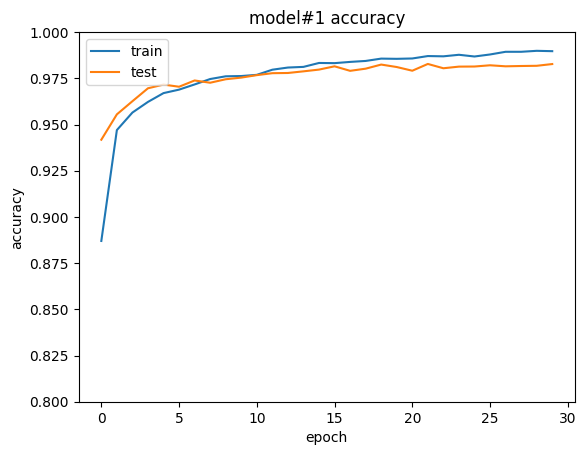

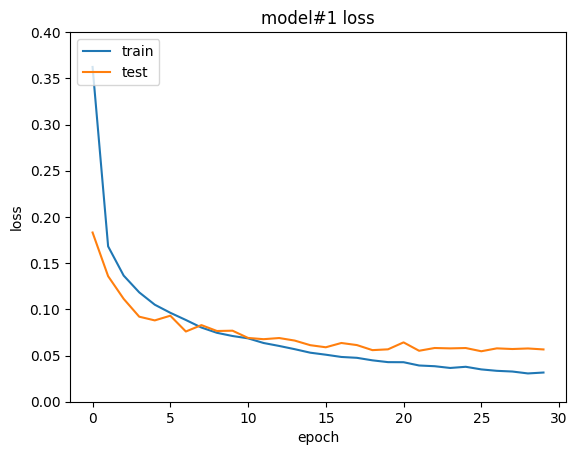

0.9827222228050232
0.9827777743339539


In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model#1 accuracy')
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model#1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,0.4)

plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history1.history['val_accuracy'][-1])
print(np.max(history1.history['val_accuracy']))

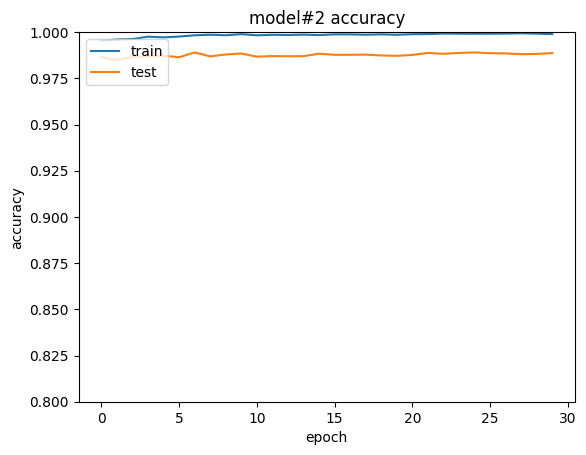

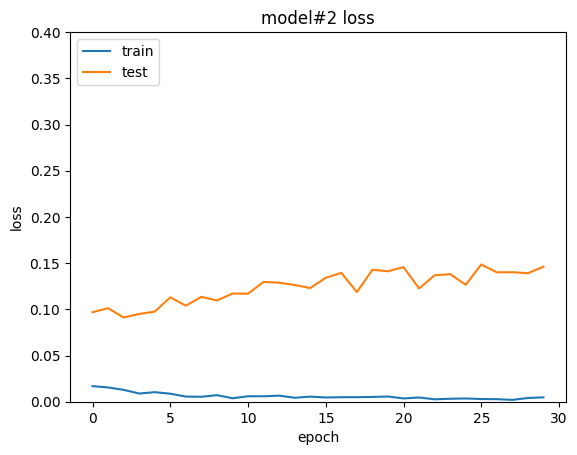

0.9886666536331177
0.9890000224113464


In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model#2 accuracy')
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model#2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,0.4)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history2.history['val_accuracy'][-1])
print(np.max(history2.history['val_accuracy']))

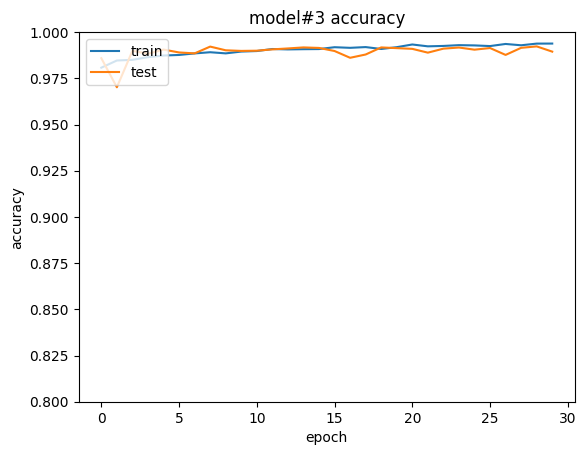

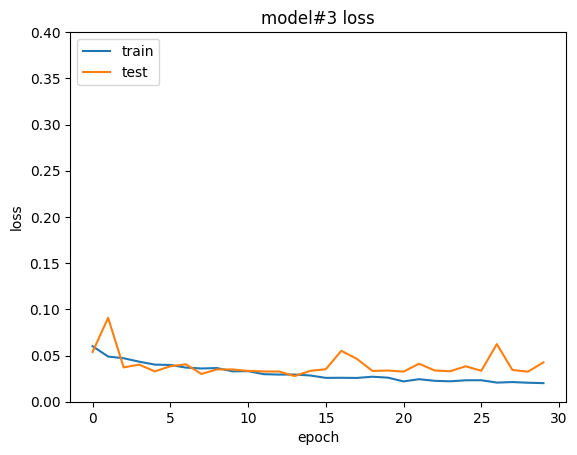

0.9894444346427917
0.9922778010368347


In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model#3 accuracy')
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model#3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,0.4)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history3.history['val_accuracy'][-1])
print(np.max(history3.history['val_accuracy']))